In [1]:
import sys
import torch
print(f"Python version: {sys.version}, {sys.version_info} ")
print(f"Pytorch version: {torch.__version__} ")

Python version: 3.7.15 (default, Oct 12 2022, 19:14:55) 
[GCC 7.5.0], sys.version_info(major=3, minor=7, micro=15, releaselevel='final', serial=0) 
Pytorch version: 1.12.1+cu113 


In [2]:
!nvidia-smi

Sun Nov 20 13:45:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:

# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 998, done.
remote: Total 998 (delta 0), reused 0 (delta 0), pack-reused 998
Receiving objects: 100% (998/998), 69.77 MiB | 15.82 MiB/s, done.
Resolving deltas: 100% (466/466), done.
/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 13.4 MB/s 


In [16]:
# Download the repo and trained weights
!git clone https://github.com/GouthamVicky/ObjectDetectionYoloV7

Cloning into 'ObjectDetectionYoloV7'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 101 (delta 2), reused 10 (delta 2), pack-reused 91
Receiving objects: 100% (101/101), 81.76 MiB | 16.98 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [5]:
#Download sample Image or upload image of our own
!wget https://stimg.cardekho.com/images/carexteriorimages/930x620/Lamborghini/Aventador/6721/Lamborghini-Aventador-SVJ/1621849426405/front-left-side-47.jpg

--2022-11-20 13:45:48--  https://stimg.cardekho.com/images/carexteriorimages/930x620/Lamborghini/Aventador/6721/Lamborghini-Aventador-SVJ/1621849426405/front-left-side-47.jpg
Resolving stimg.cardekho.com (stimg.cardekho.com)... 184.28.235.211, 184.28.235.176, 2600:1413:b000:13::b857:c18b, ...
Connecting to stimg.cardekho.com (stimg.cardekho.com)|184.28.235.211|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112498 (110K) [image/jpeg]
Saving to: ‘front-left-side-47.jpg’

front-left-side-47. 100%[===================>] 109.86K  --.-KB/s    in 0.002s  

2022-11-20 13:45:49 (57.5 MB/s) - ‘front-left-side-47.jpg’ saved [112498/112498]



In [19]:
# Detection
!python detect.py --weights ObjectDetectionYoloV7/modelWeightsFolder/best.pt --conf 0.25 --img-size 640 --source front-left-side-47.jpg

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='front-left-side-47.jpg', update=False, view_img=False, weights=['ObjectDetectionYoloV7/modelWeightsFolder/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36503348 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 m

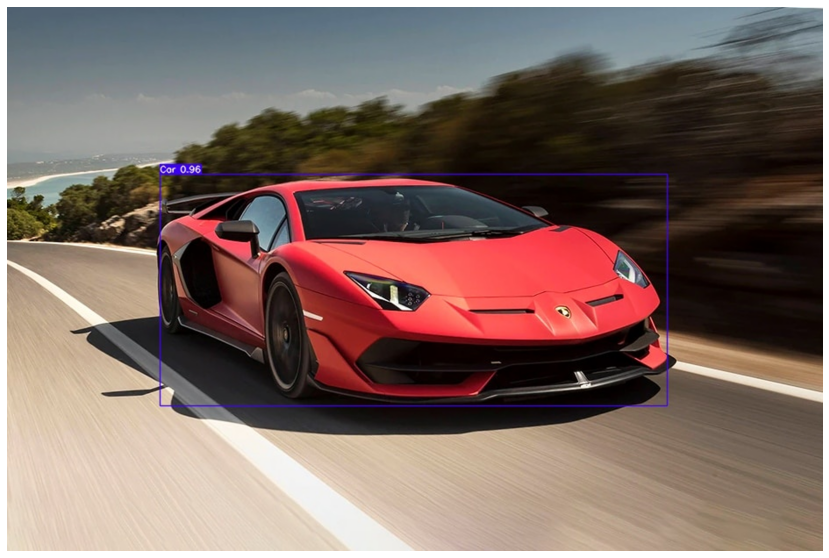

In [21]:
# define helper functions to show images
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

imShow("/content/yolov7/runs/detect/exp7/front-left-side-47.jpg")